## CHAPTER 10 - Intro to Artificial Neural Networks

In [1]:
import sys
import os

from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt

pd.options.display.max_rows=500
pd.options.display.max_columns=500

In [2]:
import statsmodels

print('The scikit-learn version is {}.'.format(statsmodels.__version__))

ModuleNotFoundError: No module named 'statsmodels'

### 1.1 - Single-TLU network

In [2]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] #petal lengtg, petal width
y = (iris.target == 0).astype(np.int) #Is Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

### Tensor flow with pip installation check:

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.6.0'

In [4]:
keras.__version__

'2.6.0'

### Image Classifier with Keras and Seq API

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:] / 255.0
y_valid, y_train =  y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
# MODEL sintax I:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
          

In [11]:
# MODEL sintax II:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:
model.get_layer('dense_3') is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05895926, -0.00243484, -0.02156412, ...,  0.0299076 ,
        -0.00690834,  0.05248143],
       [-0.0368155 , -0.00768143, -0.01485808, ..., -0.00832687,
         0.02034585,  0.00503024],
       [-0.07075715,  0.03741304, -0.04308028, ..., -0.06714501,
        -0.04244603,  0.06560196],
       ...,
       [-0.010499  , -0.00796263, -0.00645506, ...,  0.04714195,
         0.03304257, -0.00901837],
       [ 0.04357649, -0.02191432, -0.06987143, ...,  0.01001357,
         0.00944569, -0.05962294],
       [-0.06735739, -0.04182056,  0.06375726, ...,  0.04202609,
        -0.05423624,  0.02752544]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'sgd', metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7141 - accuracy: 0.7635 - val_loss: 0.5338 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4863 - accuracy: 0.8311 - val_loss: 0.4487 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4420 - accuracy: 0.8448 - val_loss: 0.4338 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4135 - accuracy: 0.8545 - val_loss: 0.3953 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3946 - accuracy: 0.8612 - val_loss: 0.3736 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3778 - accuracy: 0.8667 - val_loss: 0.3712 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3647 - accuracy: 0.8710 - val_loss: 0.3725 - val_accuracy:

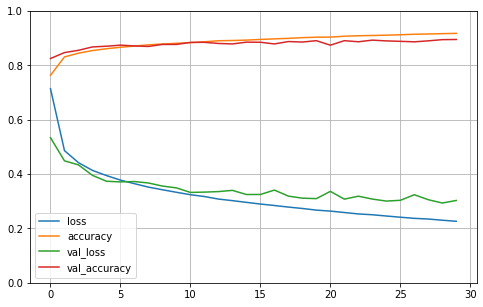

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.7007 - accuracy: 0.8551


[64.70066833496094, 0.8550999760627747]

In [25]:
#Making Predictions:

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
classes_x=np.argmax(y_proba,axis=1)

In [27]:
classes_x

array([9, 2, 1], dtype=int64)

In [28]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression MLP w/ Sequential Keras API

In [29]:
#California Housing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [30]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [32]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7890 - val_loss: 0.6164
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4712 - val_loss: 0.5091
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4368 - val_loss: 0.4829
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4418 - val_loss: 1.0516
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6639 - val_loss: 1.1859
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5392 - val_loss: 4.4548
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4527 - val_loss: 0.4097
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3972 - val_loss: 0.4107
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3775 - val_loss: 0.3918
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3722 - val_loss: 0.3876

### Building Complex Models Using Keras API:

#### Widedeep Neural Network - Learn Complex patterns and simple rules

In [33]:
X_train.shape[1:]

(8,)

In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

#### Subset of features to the simple path and anoher subset of features to de complex path:

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.8470 - val_loss: 1.0730
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8045 - val_loss: 0.7424
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6687 - val_loss: 0.6698
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6204 - val_loss: 0.6368
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5884 - val_loss: 0.6087
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5646 - val_loss: 0.5859
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5434 - val_loss: 0.5635
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5273 - val_loss: 0.5566
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5122 - val_loss: 0.5394
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4987 - val_loss: 0.5211

#### Add Aux_output layer: When you want to solve 2 dif preditions based on the same data

In [37]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name= "aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [38]:
#Define the loss function of each output:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [39]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.7268 - main_output_loss: 0.6602 - aux_output_loss: 1.3261 - val_loss: 0.5633 - val_main_output_loss: 0.5255 - val_aux_output_loss: 0.9037
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - main_output_loss: 0.4967 - aux_output_loss: 0.8507 - val_loss: 1.4172 - val_main_output_loss: 1.4442 - val_aux_output_loss: 1.1746
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5729 - main_output_loss: 0.5494 - aux_output_loss: 0.7850 - val_loss: 0.4740 - val_main_output_loss: 0.4476 - val_aux_output_loss: 0.7120
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4413 - main_output_loss: 0.4163 - aux_output_loss: 0.6661 - val_loss: 0.4550 - val_main_output_loss: 0.4342 - val_aux_output_loss: 0.6421
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4273 - main_output_loss: 0.4054 - aux_output_loss: 0.6247 - val_loss

In [40]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3620 - main_output_loss: 0.3482 - aux_output_loss: 0.4856


In [41]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [42]:
y_pred_main

array([[3.2964537],
       [1.6048795],
       [2.557675 ]], dtype=float32)

In [43]:
y_pred_aux

array([[3.3920918],
       [1.3501427],
       [2.2845201]], dtype=float32)

### Keras API for Dynamic Models

In [44]:
class WideAndDeepModel(keras.Model):
    
    def _init_(self, units=30, activation="relu", **kwargs):
        super()._init_(**kwargs) #handles standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layerDense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_A)
        hidden2 = self.hidden2(input_B)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

### Saving and Restoring Models:

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

model.save("my_keras_models.h5")

In [46]:
model = keras.models.load_model("my_keras_models.h5")

### Using Callbacks

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)

history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.3934
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5054
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8536
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4085
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3897
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3811
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3863
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3697
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3644
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3594


#### Introducing Early Stopping:

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # Roll back to the best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3621 - val_loss: 0.3696
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3590 - val_loss: 0.3664
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3513 - val_loss: 0.3638
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3473 - val_loss: 0.3605
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3444 - val_loss: 0.3641
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - val_loss: 0.3556
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3412 - val_loss: 0.3503
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3390 - val_loss: 0.3543
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3371 - val_loss: 0.3490
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3347 - val_loss: 0.3505

In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3373 - val_loss: 0.3527
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3340 - val_loss: 0.3452
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3335 - val_loss: 0.3541
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3310 - val_loss: 0.3466
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3336 - val_loss: 0.3427
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3281 - val_loss: 0.3434
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3279 - val_loss: 0.3801
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3272 - val_loss: 0.3526
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3244 - val_loss: 0.3444
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.3415

### Writting Callbacks

In [50]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### Tensor Board Visualization

In [51]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() #e.g. './my_logs/run_2021_11_11-9:23:32'

In [52]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3201 - val_loss: 0.3344
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3192 - val_loss: 0.3350
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3185 - val_loss: 0.3318
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3188 - val_loss: 0.3332
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3164 - val_loss: 0.3326
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3156 - val_loss: 0.3286
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3149 - val_loss: 0.3308
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3149 - val_loss: 0.3346
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3151 - val_loss: 0.3332
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3158 - val_loss: 0.3300

In [53]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 +1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # Some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) #random 32x32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step = step)

## Fine-tuning Neural Network Hyperparameters

### Build Model - function to use GridSearchCV or RandomizedSearchCV in w/ Keras models

In [54]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

### Keras Regressor 

In [56]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#### Fit

In [57]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data = (X_valid, y_valid),
              callbacks = [early_stopping_cb])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.4030 - val_loss: 0.9635
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7148 - val_loss: 0.6727
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5938 - val_loss: 0.6000
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5428 - val_loss: 0.5548
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5072 - val_loss: 0.5252
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4847 - val_loss: 0.5058
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4691 - val_loss: 0.4909
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4579 - val_loss: 0.4836
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4486 - val_loss: 0.4704
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - val_lo

### Hyperparam Tunning Randomized Search

In [58]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data = (X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100


C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.0782 - val_loss: 2.4818
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1677 - val_loss: 0.7296
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5562 - val_loss: 0.5353
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4808 - val_loss: 0.4892
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4511 - val_loss: 0.4649
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4358 - val_loss: 0.4467
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4212 - val_loss: 0.4324
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4118 - val_loss: 0.4283
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4030 - val_loss: 0.4173
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3979 - val_loss: 0.4094
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.1555 - val_loss: 0.7996
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.5854
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4936 - val_loss: 0.5130
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4488 - val_loss: 0.5025
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4232 - val_loss: 0.5146
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.5037
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3951 - val_loss: 0.4925
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3866 - val_loss: 0.4702
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3802 - val_loss: 0.4503
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3750 - val_loss: 0.4327
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.1707 - val_loss: 1.2796
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9447 - val_loss: 1.8307
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7853 - val_loss: 0.6542
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5085 - val_loss: 0.4697
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4327 - val_loss: 0.4460
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4117 - val_loss: 0.4326
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3991 - val_loss: 0.4200
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3889 - val_loss: 0.4136
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3796 - val_loss: 0.4049
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3734 - val_loss: 0.4003
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.1226 - val_loss: 1.4958
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.4204 - val_loss: 14.8888
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 15.7981 - val_loss: 214.0121
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 355.1969 - val_loss: 3621.9031
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 5527.5723 - val_loss: 61632.3008
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 29716.4688 - val_loss: 1064446.7500
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 169044.2188 - val_loss: 18234088.0000
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 8765162.0000 - val_loss: 305668288.0000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 105040792.0000 - val_loss: 5219588096.0000
Epoch 10/100
242/242 [============

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2363 - val_loss: 0.6679
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5608 - val_loss: 0.7440
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5140 - val_loss: 1.0576
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 1.3901
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4946 - val_loss: 1.5639
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4917 - val_loss: 1.7281
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4935 - val_loss: 1.7237
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4917 - val_loss: 1.9276
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4938 - val_loss: 1.9948
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4999 - val_lo

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.1823 - val_loss: 48.6562
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 6.6857 - val_loss: 1031.3464
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1449.1794 - val_loss: 28568.1152
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 36058.1172 - val_loss: 792240.6875
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 339628.1875 - val_loss: 22178128.0000
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 3284611.7500 - val_loss: 624675968.0000
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 830957120.0000 - val_loss: 17288781824.0000
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 6715129856.0000 - val_loss: 478254137344.0000
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 166022955008.0000 - val_loss: 13123479142400.

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.7249 - val_loss: 0.8482
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7302 - val_loss: 0.7532
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6180 - val_loss: 0.6103
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5602 - val_loss: 0.5715
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5264 - val_loss: 0.5399
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4979 - val_loss: 0.5145
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4737 - val_loss: 0.4899
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4538 - val_loss: 0.4722
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4379 - val_loss: 0.4574
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4250 - val_loss: 0.4459
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.2549 - val_loss: 1.9672
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 1.3537
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5656 - val_loss: 0.9720
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5178 - val_loss: 0.7584
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4830 - val_loss: 0.6062
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4582 - val_loss: 0.5299
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4386 - val_loss: 0.4877
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4228 - val_loss: 0.4575
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4106 - val_loss: 0.4421
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3995 - val_loss: 0.4309
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.2326 - val_loss: 0.8008
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6898 - val_loss: 0.6610
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5810 - val_loss: 0.5954
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5347 - val_loss: 0.5521
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4980 - val_loss: 0.5161
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4700 - val_loss: 0.4901
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4472 - val_loss: 0.4693
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4288 - val_loss: 0.4512
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4149 - val_loss: 0.4380
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4032 - val_loss: 0.4268
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 2.3297 - val_loss: 0.9575
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8490 - val_loss: 0.8268
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7644 - val_loss: 0.7713
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7262 - val_loss: 0.7435
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6877 - val_loss: 0.6996
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6561 - val_loss: 0.6678
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6298 - val_loss: 0.6414
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6046 - val_loss: 0.6214
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5807 - val_loss: 0.5947
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5622 - val_loss: 0.5836
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.9192 - val_loss: 1.7764
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7532 - val_loss: 1.4259
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6738 - val_loss: 1.2134
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6291 - val_loss: 1.0369
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5930 - val_loss: 0.9115
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5627 - val_loss: 0.8121
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5364 - val_loss: 0.7220
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5139 - val_loss: 0.6501
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4944 - val_loss: 0.5942
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4779 - val_loss: 0.5551
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 2.2429 - val_loss: 1.0785
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8363 - val_loss: 0.7802
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6952 - val_loss: 0.6981
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6393 - val_loss: 0.6572
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6005 - val_loss: 0.6221
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5702 - val_loss: 0.5918
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5461 - val_loss: 0.5730
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5255 - val_loss: 0.5511
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5090 - val_loss: 0.5351
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4947 - val_loss: 0.5266
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9709 - val_loss: 0.7185
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6731 - val_loss: 1.8201
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8252 - val_loss: 1.0176
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6521 - val_loss: 0.5313
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4671 - val_loss: 0.4693
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4387 - val_loss: 0.4508
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4265 - val_loss: 0.4467
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4174 - val_loss: 0.4345
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4118 - val_loss: 0.4285
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4067 - val_lo

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 0.9901 - val_loss: 0.6927
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5737 - val_loss: 0.6223
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5071 - val_loss: 0.6446
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4695 - val_loss: 0.6793
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4483 - val_loss: 0.7236
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4343 - val_loss: 0.7152
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4227 - val_loss: 0.6975
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4141 - val_loss: 0.6691
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4056 - val_loss: 0.6386
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3997 - val_loss: 0.5774
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 0.9972 - val_loss: 1.0218
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5906 - val_loss: 0.6984
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7543 - val_loss: 4.3314
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2946 - val_loss: 6.5216
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.6076 - val_loss: 2.4194
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9943 - val_loss: 0.5103
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4450 - val_loss: 0.4385
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4104 - val_loss: 0.4246
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3957 - val_loss: 0.4199
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3890 - val_loss: 0.4235
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 3.8102 - val_loss: 2.6128
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.0380 - val_loss: 1.7169
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5369 - val_loss: 1.4615
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3949 - val_loss: 1.3861
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3542 - val_loss: 1.3636
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3426 - val_loss: 1.3568
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3393 - val_loss: 1.3544
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3383 - val_loss: 1.3536
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3379 - val_loss: 1.3532
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3378 - val_loss: 1.3531
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 3.8320 - val_loss: 2.5718
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.9636 - val_loss: 1.6509
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4360 - val_loss: 1.3664
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2617 - val_loss: 1.2634
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1745 - val_loss: 1.2069
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0883 - val_loss: 1.1682
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9808 - val_loss: 1.1708
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8697 - val_loss: 1.2333
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7887 - val_loss: 1.3041
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7425 - val_loss: 1.3225
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 3.5607 - val_loss: 2.1037
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6387 - val_loss: 1.4188
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3405 - val_loss: 1.2837
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2335 - val_loss: 1.1819
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1411 - val_loss: 1.0876
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0491 - val_loss: 0.9989
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9552 - val_loss: 0.9138
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8715 - val_loss: 0.8478
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8117 - val_loss: 0.7999
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7677 - val_loss: 0.7630
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.4109 - val_loss: 8.4941
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 5.6790 - val_loss: 86.3445
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 18.4094 - val_loss: 770.7706
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 159.9398 - val_loss: 7373.7012
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1465.5465 - val_loss: 68836.1328
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 12720.8711 - val_loss: 644848.0625
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 127556.5469 - val_loss: 6057248.5000
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 3871696.2500 - val_loss: 56946808.0000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 30121006.0000 - val_loss: 535134624.0000
Epoch 10/100
242/242 [=================

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.2057 - val_loss: 0.7893
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5309 - val_loss: 0.5617
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5126 - val_loss: 0.5914
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5031 - val_loss: 0.7219
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4986 - val_loss: 0.9141
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4953 - val_loss: 1.0881
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4921 - val_loss: 1.2360
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4919 - val_loss: 1.3838
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4905 - val_loss: 1.5341
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4910 - val_loss: 1.6192
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.5060 - val_loss: 3.2775
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8092 - val_loss: 41.5024
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 23.5024 - val_loss: 487.6916
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 333.7767 - val_loss: 5963.2490
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 3850.1985 - val_loss: 72932.5938
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 25695.3867 - val_loss: 890873.6875
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 546810.9375 - val_loss: 10908845.0000
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 2776288.0000 - val_loss: 135091536.0000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 69533808.0000 - val_loss: 1640974464.0000
Epoch 10/100
242/242 [==============

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.8623 - val_loss: 5.5691
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.9091 - val_loss: 38.6669
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 8.4367 - val_loss: 198.7332
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 96.8980 - val_loss: 1147.1865
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 262.9049 - val_loss: 6458.9277
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 2626.1338 - val_loss: 36844.4609
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 18838.0469 - val_loss: 208756.3594
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 42092.2891 - val_loss: 1190117.2500
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 246362.3281 - val_loss: 6741221.5000
Epoch 10/100
242/242 [==============================] 

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 1.4294 - val_loss: 0.9396
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5200 - val_loss: 1.0670
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5063 - val_loss: 1.2199
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4993 - val_loss: 1.3546
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4944 - val_loss: 1.4600
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4929 - val_loss: 1.5828
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4912 - val_loss: 1.6847
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4902 - val_loss: 1.7733
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4890 - val_loss: 1.8163
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4900 - val_loss: 1.8685
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 2.2292 - val_loss: 8.9488
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 5.3092 - val_loss: 59.6934
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 24.1550 - val_loss: 389.1627
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 98.4041 - val_loss: 2778.7542
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1074.3158 - val_loss: 18849.2988
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 4547.5815 - val_loss: 131901.7656
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 32611.9355 - val_loss: 912607.4375
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 365430.6875 - val_loss: 6259685.0000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1806845.0000 - val_loss: 43151032.0000
Epoch 10/100
242/242 [=========================

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 1.4499 - val_loss: 0.6928
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6163 - val_loss: 0.5982
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5241 - val_loss: 0.5098
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4785 - val_loss: 0.4800
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4528 - val_loss: 0.4550
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4330 - val_loss: 0.4401
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4199 - val_loss: 0.4328
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4094 - val_loss: 0.4199
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4021 - val_loss: 0.4166
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3958 - val_loss: 0.4082
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3812 - val_loss: 0.8020
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5924 - val_loss: 0.6080
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5246 - val_loss: 0.5467
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4831 - val_loss: 0.5274
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4557 - val_loss: 0.5113
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4351 - val_loss: 0.4914
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4198 - val_loss: 0.4754
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.4643
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3982 - val_loss: 0.4401
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3902 - val_lo

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4099 - val_loss: 1.1013
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7364 - val_loss: 0.6302
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5656 - val_loss: 0.5767
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5089 - val_loss: 0.5201
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4669 - val_loss: 0.4850
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4359 - val_loss: 0.4578
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4151 - val_loss: 0.4375
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3999 - val_loss: 0.4285
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3886 - val_loss: 0.4193
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3804 - val_lo

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 5.9025 - val_loss: 5.1970
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 4.3095 - val_loss: 3.8286
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 3.2162 - val_loss: 2.8854
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.4567 - val_loss: 2.2288
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.9236 - val_loss: 1.7668
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5463 - val_loss: 1.4398
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2775 - val_loss: 1.2062
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0849 - val_loss: 1.0392
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9463 - val_loss: 0.9187
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8460 - val_loss: 0.8317
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 2ms/step - loss: 6.7457 - val_loss: 7.8400
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 5.0315 - val_loss: 6.4506
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 3.7985 - val_loss: 5.4445
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.9095 - val_loss: 4.7139
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 2.2661 - val_loss: 4.1827
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8005 - val_loss: 3.7960
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4627 - val_loss: 3.5142
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2171 - val_loss: 3.3076
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0381 - val_loss: 3.1567
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9075 - val_loss: 3.0460
E

C:\Users\d12669\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


242/242 [==============================] - 1s 3ms/step - loss: 5.7629 - val_loss: 4.9739
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 4.2286 - val_loss: 3.7172
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 3.1737 - val_loss: 2.8372
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.4395 - val_loss: 2.2165
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.9239 - val_loss: 1.7759
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5592 - val_loss: 1.4616
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2998 - val_loss: 1.2364
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1141 - val_loss: 1.0744
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9807 - val_loss: 0.9572
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8839 - val_loss: 0.8719
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000020F710DBDC8>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F723E4F88>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [59]:
rnd_search_cv.best_params_

{'learning_rate': 0.0023840221939039176, 'n_hidden': 3, 'n_neurons': 61}

In [61]:
rnd_search_cv.best_score_

-0.32505594690640766

In [63]:
model = rnd_search_cv.best_estimator_.model